# Breast Cancer Detection using Classification Algorithms - Performance Analysis

##### Problem Statement
As an extension of my mid term research 'Applications of Big Data analytics in Healthcare', I worked on disease diagnosis for my final project. Machine learning algorithms are widely applied in computer aided medical diagnosis to develop predictive models based on pattern recognition, resulting in improved accuracy of perception and diagnosis of disease. <br/>

As Breast cancer is the most common type of cancers and main cause of women's deaths worldwide, I applied classification algorithms to breast cancer data and analyzed their performance. I analyzed the performance of Logistic Regression, Decision tree, Random Forest, Support Vector Machine algorithms when on Wisconsin Breast Cancer data from UCI machine learning repository to classify the tumor as benign or malign. <br/>

##### About Data
Wisconsin Breast Cancer dataset has 699 observations collected using fine-needle tissue from a mass under skin. It has 11 variables of which nine are predictor variables (cytological characteristics used to identify mass as benign or malign), ID and a class variable (has values 2 for benign, 4 for malignant). 458 of the samples are benign and 241 are malignant. <br/>

There are 16 samples with missing data. Data file doesn't have column names and they are listed in a separate file. <br/>
'class' variable is the outcome (2=benign, 4=malignant).

###### Importing required modules

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
#from sklearn.module_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

###### Data Preprocessing

In [36]:
data = pd.read_csv('data/breast-cancer-wisconsin.data.txt', sep=",", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


###### Adding column headers to data

In [37]:
data.columns = ["ID", "clumpThickness", "sizeUniformity",
"shapeUniformity", "maginalAdhesion",
"singleEpithelialCellSize", "bareNuclei",
"blandChromatin", "normalNucleoli", "mitosis", "class"]
data.head(10)

,ID,clumpThickness,sizeUniformity,shapeUniformity,maginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [38]:
data.shape

(699, 11)

###### Counting the different classes of 'class' variable

In [39]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

###### Converting classes '2','4' to binary '0'(benign) and '1'(malignant)

In [40]:
data['class'].replace(2, 0, inplace=True)
data['class'].replace(4, 1, inplace=True)
data['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

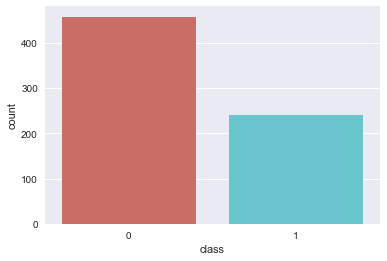

In [41]:
sns.countplot(x='class', data=data, palette = 'hls')
plt.show()

In [42]:
data.dtypes

ID                           int64
clumpThickness               int64
sizeUniformity               int64
shapeUniformity              int64
maginalAdhesion              int64
singleEpithelialCellSize     int64
bareNuclei                  object
blandChromatin               int64
normalNucleoli               int64
mitosis                      int64
class                        int64
dtype: object

######  Converting 'class' variable from int to string

In [43]:
data['class'] = data['class'].astype('str')

In [44]:
data.dtypes

ID                           int64
clumpThickness               int64
sizeUniformity               int64
shapeUniformity              int64
maginalAdhesion              int64
singleEpithelialCellSize     int64
bareNuclei                  object
blandChromatin               int64
normalNucleoli               int64
mitosis                      int64
class                       object
dtype: object

In [45]:
#Converting 'object' to numeric data type
data['bareNuclei'] = pd.to_numeric(data['bareNuclei'], errors='coerce')

In [46]:
data.dtypes

ID                            int64
clumpThickness                int64
sizeUniformity                int64
shapeUniformity               int64
maginalAdhesion               int64
singleEpithelialCellSize      int64
bareNuclei                  float64
blandChromatin                int64
normalNucleoli                int64
mitosis                       int64
class                        object
dtype: object

###### Checking for missing values

In [47]:
data.isnull().sum()

ID                           0
clumpThickness               0
sizeUniformity               0
shapeUniformity              0
maginalAdhesion              0
singleEpithelialCellSize     0
bareNuclei                  16
blandChromatin               0
normalNucleoli               0
mitosis                      0
class                        0
dtype: int64

###### Imputation for missing values
Missing data may cause bias and reduction in efficiency. This can be solved by Imputation which is the process of replacing missing data with an estimate. Some ways of choosing estimate is mean/median or regression.<br/>
Here I have coosen mean of the column 'bareNuclei' for imputation.

In [48]:
data["bareNuclei"].fillna(data["bareNuclei"].mean(), inplace=True)

In [49]:
#Now check for missing values in dataframe
data.isnull().sum()

ID                          0
clumpThickness              0
sizeUniformity              0
shapeUniformity             0
maginalAdhesion             0
singleEpithelialCellSize    0
bareNuclei                  0
blandChromatin              0
normalNucleoli              0
mitosis                     0
class                       0
dtype: int64

In [50]:
#Dropping ID column as it is irrelevant
data = data.drop(['ID'], axis=1)
data.columns

Index(['clumpThickness', 'sizeUniformity', 'shapeUniformity',
       'maginalAdhesion', 'singleEpithelialCellSize', 'bareNuclei',
       'blandChromatin', 'normalNucleoli', 'mitosis', 'class'],
      dtype='object')

In [51]:
data.describe()

,clumpThickness,sizeUniformity,shapeUniformity,maginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


###### Distribution of data for continuous variables 

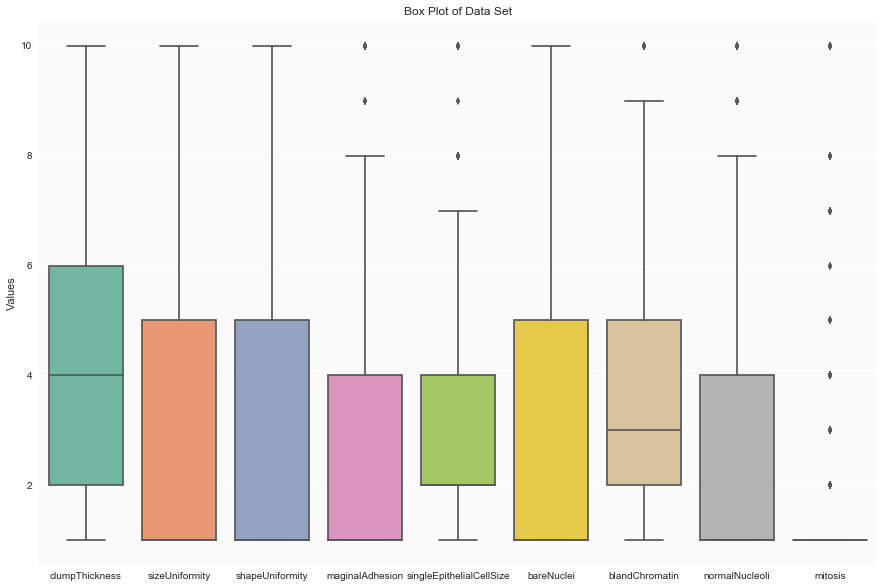

In [52]:
#import seaborn as sns
#sns.boxplot(data=data, orient="h", palette="Set2")
f, ax = plt.subplots(figsize=(15, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 50))
plt.ylabel('Values')
plt.title("Box Plot of Data Set")
sns.boxplot(data = data.iloc[:, data.columns != 'class'], 
  orient = 'v', 
  palette = 'Set2')

In [53]:
data['mitosis'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitosis, dtype: int64

In [54]:
np.ravel(data['class'])

array(['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0

###### Splitting dataset into test and train
Split the data in ratios of 70:30 for training and test respectively

In [55]:
X = data.iloc[:, 0:8].values
X = np.array(X)
y = data.iloc[:, 9].values
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [56]:
y_train.shape

(489,)

## Logistic Regression
Logistic regression is a supervised classification algorithm used to predict the probability of a dependent variable using the logistic function. Dependent variable is a binary variable that has data as 0(no) and 1(yes). <br/>

Simply put logistic regression predicts P(Y=1) as a function of X.<br/>

Mathematically, <br/>
odds= p/ (1-p) = probability of event occurrence / probability of not event occurrence <br/>
ln(odds) = ln(p/(1-p)) <br/>
logit(p) = ln(p/(1-p)) = b0+b1X1+b2X2+b3X3....+bkXk <br/>

Here, p is the probability of a class.

In [57]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
lg_y_pred = LogReg.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

lg_cm = confusion_matrix(y_test, lg_y_pred)
print(lg_cm)

lg_cmat = pd.crosstab(y_test, lg_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
lg_cmat

[[141   2]
 [  6  61]]


Predicted,0,1,All
Actual,,,
0,141,2,143
1,6,61,67
All,147,63,210


![title](images/confusion_matrix.png)

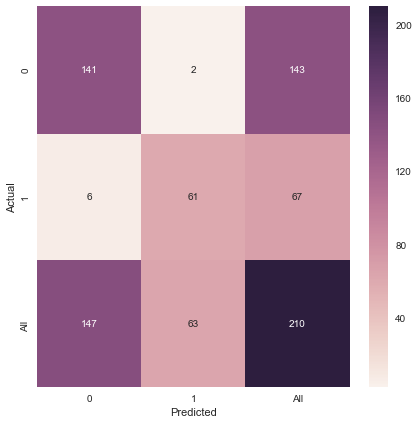

In [60]:
f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(lg_cmat,annot=True, fmt="d")  

###### Sensitivity and specificity
Statistical measures of the performance of a binary classification test. <br/>

In [61]:
#Calculate Tp,FP,TN,FN
TP = lg_cm[1, 1]
TN = lg_cm[0, 0]
FP = lg_cm[0, 1]
FN = lg_cm[1, 0]

**Sensitivity** – Ability of a test to correctly identify those with the disease (true positive rate). <br/>
sensitivity/recall = tp / t = tp / (tp + fn)

In [62]:
print("Sensitivity:",TP / float(TP + FN))

Sensitivity: 0.910447761194


**Specificity** - Ability of a test to correctly identify those without the disease (true negative rate). <br/>
specificity = tn / n = tn / (tn + fp)

In [63]:
print("Specificity:",TN / float(TN + FP))

Specificity: 0.986013986014


###### sklearn classification report
It is a metric which returns precision,recall,f1-score. <br/>

**Precision** is tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. It is the ability of the classifier to not label a sample as positive if it is negative.<br/>

**recall/sensitivity** is tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. It is the ability of the classifier to find all the positive samples.<br/>

**f1-score** is a weighted harmonic mean of the precision and recall.<br/>

**support** is the number of occurrences of each class in y_test.<br/>

In [64]:
print(classification_report(y_test, lg_y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       143
          1       0.97      0.91      0.94        67

avg / total       0.96      0.96      0.96       210



In [65]:
print("Accuracy on the training set: {:.3f}".format(LogReg.score(X_train,y_train)))
print("Accuracy on the test set: {:.3f}".format(LogReg.score(X_test,y_test)))

Accuracy on the training set: 0.961
Accuracy on the test set: 0.962


## Decision Trees
Decision Tree algorithm belongs to family of supervised learning algorithms which can be used for solving both classification and regression problems.<br/>
Like other classification algorithms decision tree predicts class/target variable by learning decision rules from training data.<br/>

Algorithm solves problem by using tree representation by placing best attribute at root of tree. Then splitting data into subsets until we find leaf nodes in all branches of tree.<br/>
Attribute selection criteria followed by sklearn DecisionTreeClassifier is 'gini'

In [66]:
DecTree = tree.DecisionTreeClassifier()
DecTree = DecTree.fit(X_train,y_train)

dt_y_pred = DecTree.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test, dt_y_pred)
print(dt_cm)

dt_ct = pd.crosstab(y_test, dt_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
dt_ct

[[139   4]
 [  7  60]]


Predicted,0,1,All
Actual,,,
0,139,4,143
1,7,60,67
All,146,64,210


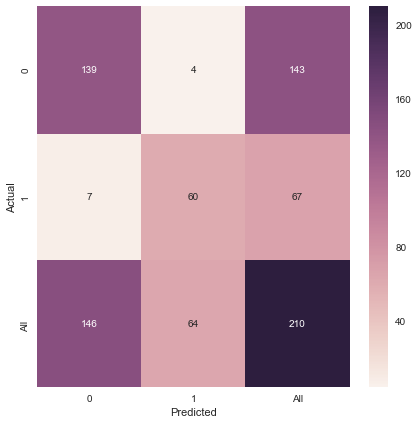

In [68]:
f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(dt_ct,annot=True, fmt="d")  

In [69]:
#Calculate Tp,FP,TN,FN
TP = dt_cm[1, 1]
TN = dt_cm[0, 0]
FP = dt_cm[0, 1]
FN = dt_cm[1, 0]

In [70]:
print("Sensitivity:",TP / float(TP + FN))

Sensitivity: 0.89552238806


In [71]:
print("Specificity:",TN / float(TN + FP))

Specificity: 0.972027972028


In [72]:
print(classification_report(y_test, dt_y_pred))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       143
          1       0.94      0.90      0.92        67

avg / total       0.95      0.95      0.95       210



In [73]:
print("Accuracy on the training set: {:.3f}".format(DecTree.score(X_train,y_train)))
print("Accuracy on the test set: {:.3f}".format(DecTree.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.948


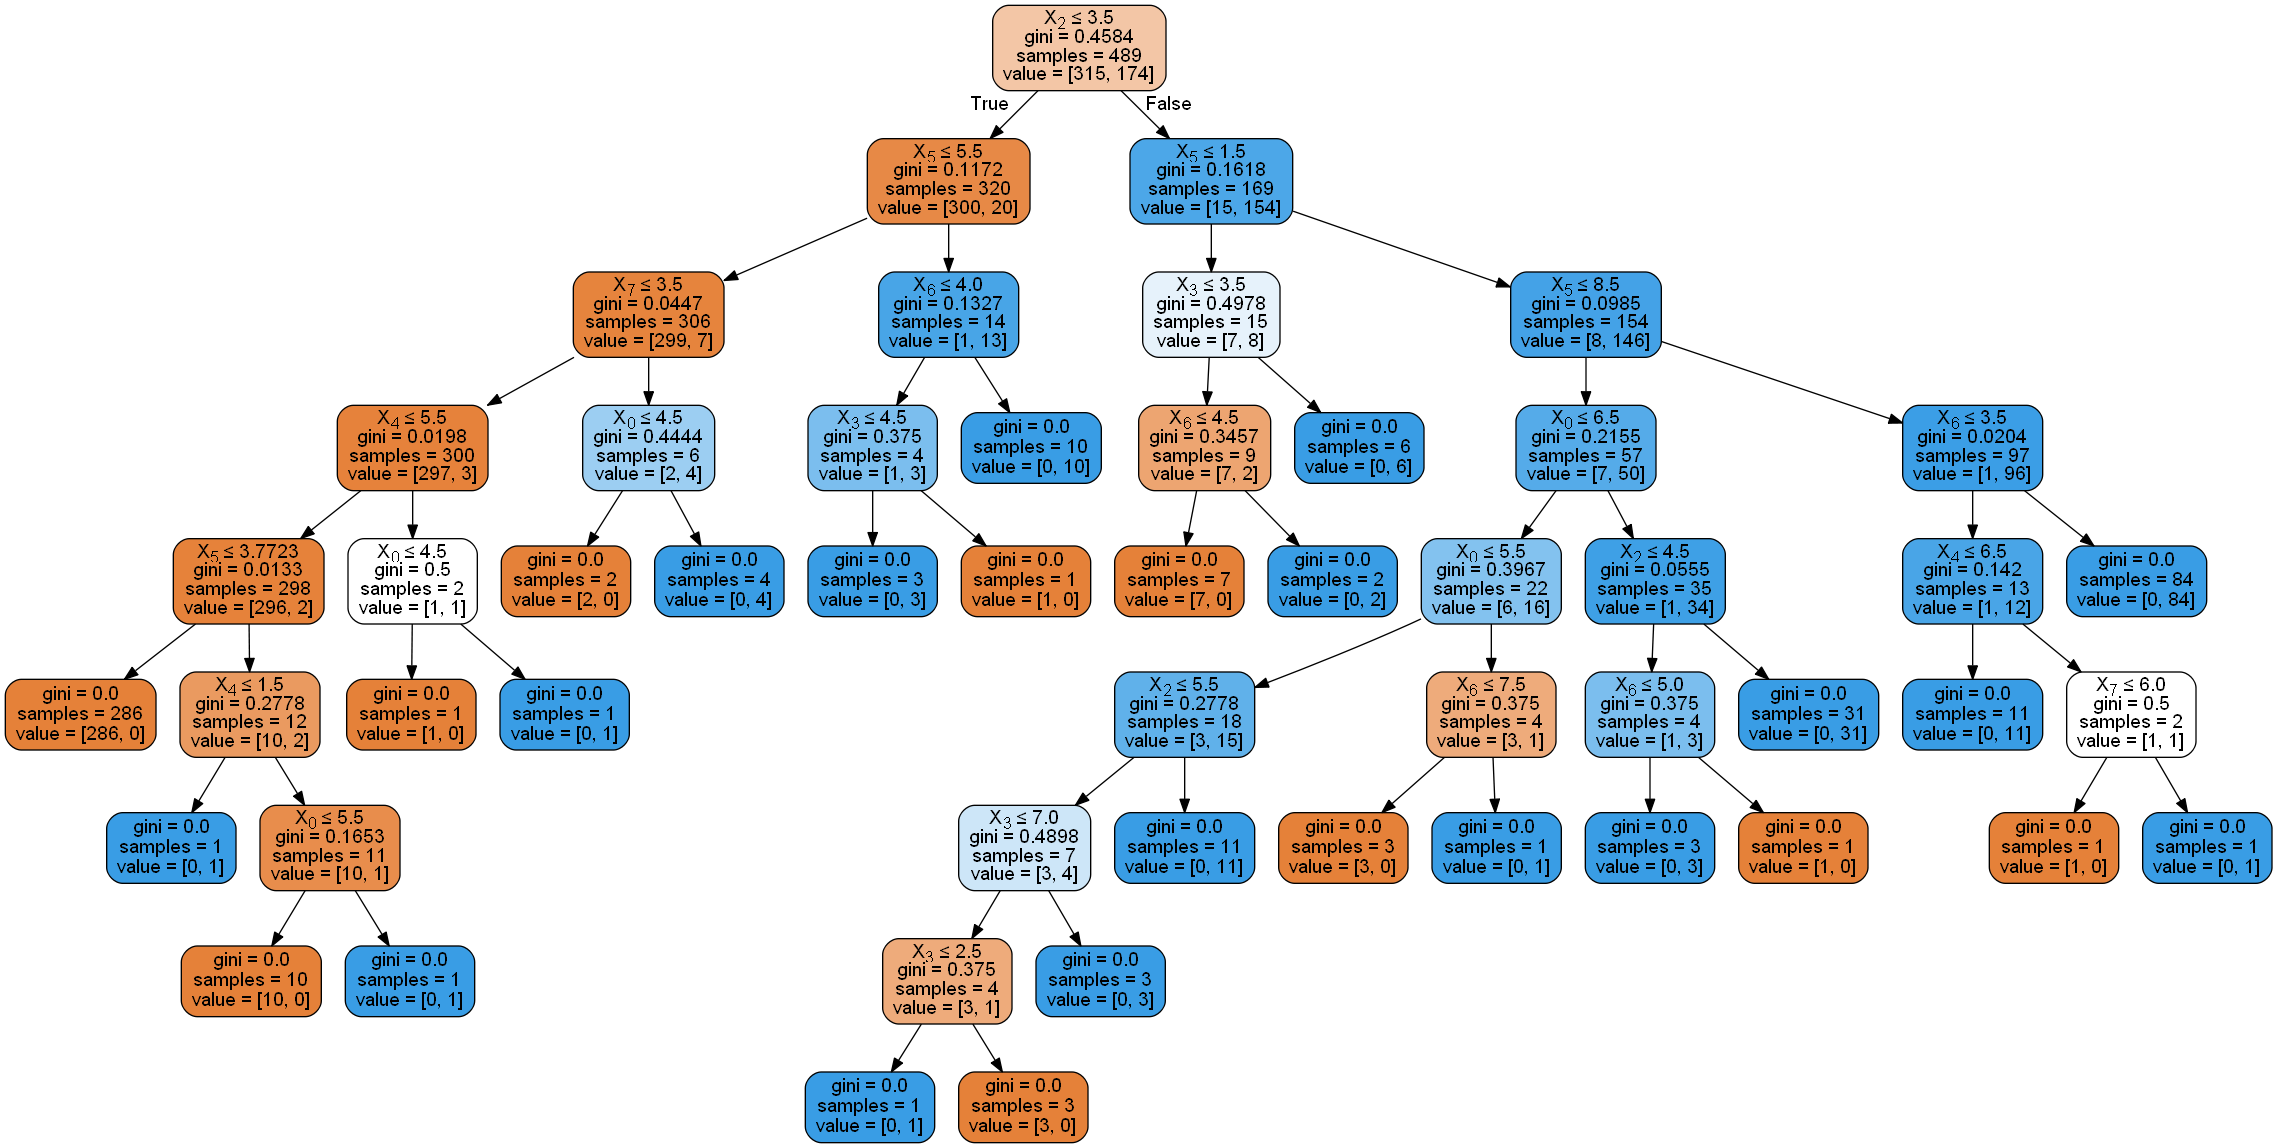

In [74]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DecTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph
Image(graph.create_png())

## Random Forest
Random Forest is an ensemble/collection of decision trees.<br/> 
To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class.<br/> 
The forest chooses the classification having the most votes (over all the trees in the forest).

In [75]:
RandFort = RandomForestClassifier(n_estimators=100, random_state=0)
RandFort.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [76]:
rf_y_pred = RandFort.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)

rf_ct = pd.crosstab(y_test, rf_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
rf_ct

[[141   2]
 [  3  64]]


Predicted,0,1,All
Actual,,,
0,141,2,143
1,3,64,67
All,144,66,210


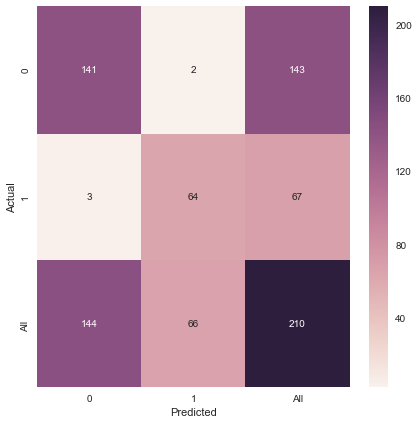

In [78]:
f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(rf_ct,annot=True, fmt="d")

In [79]:
#Calculate Tp,FP,TN,FN
TP = rf_cm[1, 1]
TN = rf_cm[0, 0]
FP = rf_cm[0, 1]
FN = rf_cm[1, 0]

In [80]:
print("Sensitivity:",TP / float(TP + FN))

Sensitivity: 0.955223880597


In [81]:
print("Specificity:",TN / float(TN + FP))

Specificity: 0.986013986014


In [82]:
print(classification_report(y_test, rf_y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       143
          1       0.97      0.96      0.96        67

avg / total       0.98      0.98      0.98       210



In [83]:
print("Accuracy on the training set: {:.3f}".format(RandFort.score(X_train,y_train)))
print("Accuracy on the test set: {:.3f}".format(RandFort.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.976


## Support Vector Machine (SVM)
SVM is a classification algorithm where we plot each data item as a point in n-dimensional space (where n is number of features of data) with the value of each feature being the value of a particular coordinate. These coordinates are called support vectors.<br/>

Then we find some line that splits the data between the two differently classified groups of data.<br/>
This will be the line such that the distances from the closest point in each of the two groups will be farthest away.<br/>

![title](images/SVM.png)

In the example shown above, the line which splits the data into two differently classified groups is the black line, since the two closest points are the farthest apart from the line. This line is our classifier. 

In [84]:
SVM = SVC(probability=True)
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
svm_y_pred = SVM.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix

svm_cm = confusion_matrix(y_test, svm_y_pred)
print(svm_cm)
#print(pd.DataFrame(svm_cm))

svm_ct = pd.crosstab(y_test, svm_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
svm_ct

[[135   8]
 [  1  66]]


Predicted,0,1,All
Actual,,,
0,135,8,143
1,1,66,67
All,136,74,210


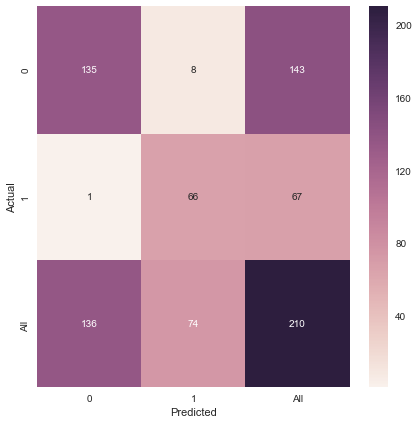

In [87]:
f, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(svm_ct,annot=True, fmt="d")

In [88]:
#Calculate Tp,FP,TN,FN
TP = svm_cm[1, 1]
TN = svm_cm[0, 0]
FP = svm_cm[0, 1]
FN = svm_cm[1, 0]

In [89]:
print("Sensitivity:",TP / float(TP + FN))

Sensitivity: 0.985074626866


In [90]:
print("Specificity:",TN / float(TN + FP))

Specificity: 0.944055944056


In [91]:
print(classification_report(y_test, svm_y_pred))

             precision    recall  f1-score   support

          0       0.99      0.94      0.97       143
          1       0.89      0.99      0.94        67

avg / total       0.96      0.96      0.96       210



In [92]:
print("Accuracy on the training set: {:.3f}".format(SVM.score(X_train,y_train)))
print("Accuracy on the test set: {:.3f}".format(SVM.score(X_test,y_test)))

Accuracy on the training set: 0.996
Accuracy on the test set: 0.957


##### Receiving Operating Characteristic( ROC )
It is used for visually inspecting the performance of a binary classifier (0/1). <br/>
It **compares the rate at which the classifier is making correct predictions (True Positives or TP) and the rate at which it is making false alarms (False Positives or FP).** <br/>

** Area Under Curve (AUC) ** - is the space underneath the ROC curve.<br/>
More up and left the ROC curve is, AUC will be larger and classifier is better.<br/>

The **dashed line** along diagonal approximates the line if a random guess (coin-flip) were taken. <br/>

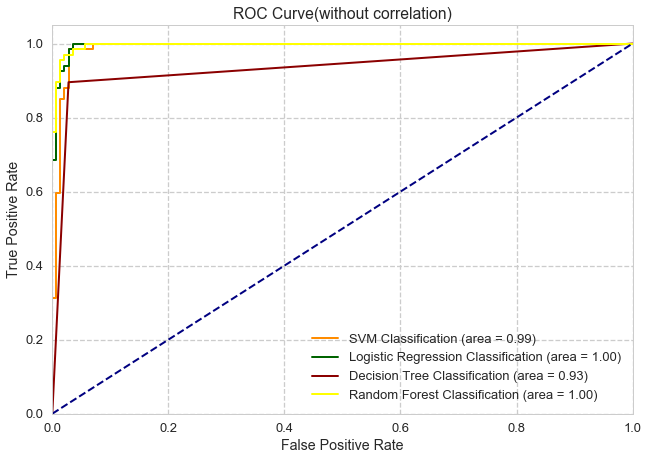

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, 
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


#For Logistic Regression
lr_y_prob = LogReg.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_prob, pos_label='1')
lr_roc_auc = auc(lr_fpr, lr_tpr)

#For Decision Tree
dt_y_prob = DecTree.predict_proba(X_test)[:,1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_prob, pos_label='1')
dt_roc_auc = auc(dt_fpr, dt_tpr)

#For Random Forest
rf_y_prob = RandFort.predict_proba(X_test)[:,1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob, pos_label='1')
rf_roc_auc = auc(rf_fpr, rf_tpr)


#For SVM Classification
svm_y_prob = SVM.predict_proba(X_test)[:,1]

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_prob, pos_label='1')
svm_roc_auc = auc(svm_fpr, svm_tpr)

plt.figure()
plt.plot(svm_fpr, svm_tpr, color='darkorange',
         lw=2, label='SVM Classification (area = %0.2f)' % svm_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression Classification (area = %0.2f)' % lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='darkred',
         lw=2, label='Decision Tree Classification (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='yellow',
         lw=2, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(without correlation)')
plt.legend(loc="lower right")
plt.show()

In [94]:
accuracies = [{'Classifier_model': 'Log Reg', 'data_category': 'test', 'accuracy': float("{0:.2f}".format(LogReg.score(X_test,y_test)))},
         {'Classifier_model': 'Log Reg', 'data_category': 'train', 'accuracy': float("{0:.2f}".format(LogReg.score(X_train,y_train)))},
         {'Classifier_model': 'Decision tree', 'data_category': 'test', 'accuracy': float("{0:.2f}".format(DecTree.score(X_test,y_test)))},
         {'Classifier_model': 'Decision tree', 'data_category': 'train', 'accuracy': float("{0:.2f}".format(DecTree.score(X_train,y_train)))},
         {'Classifier_model': 'Random Forest', 'data_category': 'test', 'accuracy': float("{0:.2f}".format(RandFort.score(X_test,y_test)))},
         {'Classifier_model': 'Random Forest', 'data_category': 'train', 'accuracy': float("{0:.2f}".format(RandFort.score(X_train,y_train)))},
	     {'Classifier_model': 'SVM', 'data_category': 'test', 'accuracy': float("{0:.2f}".format(SVM.score(X_test,y_test)))},
         {'Classifier_model': 'SVM', 'data_category': 'train', 'accuracy': float("{0:.2f}".format(SVM.score(X_train,y_train)))}
]
ac = pd.DataFrame(accuracies)

In [95]:
ac

,Classifier_model,accuracy,data_category
0,Log Reg,0.96,test
1,Log Reg,0.96,train
2,Decision tree,0.95,test
3,Decision tree,1.00,train
4,Random Forest,0.98,test
5,Random Forest,1.00,train
6,SVM,0.96,test
7,SVM,1.00,train


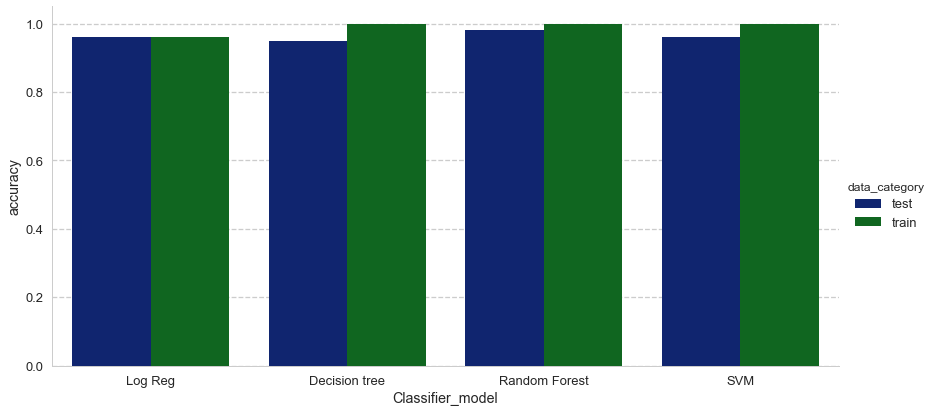

In [96]:
sns.factorplot(x="Classifier_model", y="accuracy", hue="data_category", data=ac, kind="bar",size=6, aspect=2);

#### References

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br/>
http://www.data-mania.com/blog/logistic-regression-example-in-python/ <br/>
https://krakan.ca/2017/09/predicting-breast-cancer-diagnoses-using-decision-tree-classification/ <br/>
https://github.com/Elhamkesh/Breast-Cancer-Scikitlearn/blob/master/CancerML.ipynb <br/>
https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic <br/>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br/>
https://medium.freecodecamp.org/the-hitchhikers-guide-to-machine-learning-algorithms-in-python-bfad66adb378 <br/>
http://blog.yhat.com/posts/roc-curves.html <br/>
http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/ <br/>
http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/ <br/>
http://scikit-learn.org/stable/supervised_learning.html#supervised-learning <br/>
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/  <br/>
https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/ <br/>
https://medium.freecodecamp.org/the-hitchhikers-guide-to-machine-learning-algorithms-in-python-bfad66adb378 <br/>
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/ <br/>
https://www.dataquest.io/blog/machine-learning-python/ <br/>
https://pythonprogramming.net/machine-learning-tutorial-python-introduction/ <br/>